In [3]:
import os

import numpy as np
import torch

import lib.dataset.dataset2D as dataUtils
from lib.dataset.dataset2D import Dataset2D
from lib.hybridnet.modules.efficienttrack.efficienttrack import EfficientTrack

from lib.config.project_manager import ProjectManager

project = ProjectManager()
project.load('Ralph_Center_Test')

#project.create_new(
#    name = 'Face_Pretrain',
#    dataset2D_path = '/home/trackingsetup/Documents/Vortex/datasets/WFLW_Set',
#    dataset3D_path = None)

cfg = project.get_cfg()

Successfully loaded project Ralph_Center_Test!


In [4]:
training_set = Dataset2D(project.cfg, set='train', mode = 'center')
val_set = Dataset2D(project.cfg, set='val',mode = 'center')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [5]:
weights = '/home/trackingsetup/Downloads/EfficientTrack-d2_100.pth'

efficientTrack = EfficientTrack('train', cfg, None)

Initializing weights...


In [6]:
efficientTrack.train(training_set, val_set, 1000)

  0%|          | 0/789 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
import lib.hybridnet.modules.efficienttrack.darkpose as darkpose
import cv2
import matplotlib.pyplot as plt

weights = "/home/timo/Desktop/HybridNet/projects/Ralph_Center_Test/models/efficienttrack/EfficientTrack-d0_210.pth"

efficientTrack = EfficientTrack('inference', cfg, weights)

[[[231.19955]]]


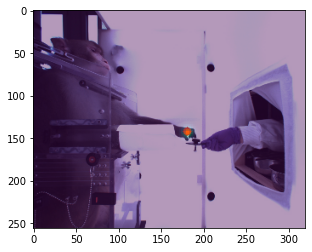

In [11]:
#j = 0
item = val_set.__getitem__(j)
j += 40
imgs = item[0]
img = ((imgs*cfg.DATASET.STD)+cfg.DATASET.MEAN)*255

imgs = torch.from_numpy(imgs).permute(2, 0, 1).float()

imgs = imgs.reshape(1,3,256,320)
imgs = imgs.cuda()
outputs = efficientTrack.model(imgs)
preds, maxvals = darkpose.get_final_preds(outputs[1].clamp(0,255).detach().cpu().numpy(), None)

print (maxvals)

colors = [(255,0,0), (255,0,0),(255,0,0),(255,0,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,0,255),(0,0,255),(0,0,255),(0,0,255),(255,255,0),(255,255,0),(255,255,0), (255,255,0),
                  (0,255,255),(0,255,255),(0,255,255),(0,255,255), (255,0,255),(100,0,100),(100,0,100)]
for i,point in enumerate(preds[0]):
    if (maxvals[0][i]) > 10:
        cv2.circle(img, (int(point[0]*2), int(point[1])*2), 2, (255,0,0), thickness=5)
    else:
        cv2.circle(img, (int(point[0]*2), int(point[1])*2), 2, (100,0,0), thickness=5)

plt.imshow(img/255.)
hetamap = cv2.resize(outputs[1].clamp(0,255).detach().cpu().numpy()[0][0]/255., (320,256), interpolation=cv2.cv2.INTER_NEAREST)
plt.imshow(hetamap, alpha=0.4)
plt.imsave( 'test.png',img/255.)
#plt.savefig('test.png')